# Example 1: Tile Analysis


In this first notebook, we illustrate the use of **RADWave** to extract wave conditions based on altimeter data for a specific geographical region. 

We will be querying data already downloaded from the obtained from Australian Ocean Data Network portal [AODN](https://portal.aodn.org.au/). 

> We recomend to look at **RADWave** [documentation](https://radwave.readthedocs.io/en/latest/usage.html#getting-altimeter-values-from-data-providers) and the embeded video that explain how to select both a spatial bounding box and a temporal extent from the portal and how to export the file containing the `List of URLs`. This `TXT` file contains a list of `NETCDF` files for each available satellites. 

In [27]:
from IPython.display import IFrame
IFrame(src='https://bit.ly/2ROFoLY', width=900, height=600)

## Loading RADWave library and initialisation

We first start by importing **RADwave** library into our working space.

In [1]:
import RADWave as rwave

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Next, provide the path to the downloaded text file and run in through the following block to make sure the URLs are formatted correctly.

In [ ]:
AltimeterData = '../dataset/IMOSURLs.txt'

try:
    with open(AltimeterData, "r+") as text_file:
        texts = text_file.read()
        texts = texts.replace("https://imos-data.s3-ap-southeast-2.amazonaws.com", "http://data.aodn.org.au")
    with open(AltimeterData, "w") as text_file:
        text_file.write(texts)
    print('URLs are formatted.')
except FileNotFoundError as f:
    print("Could not find the file you are trying to read.")

Once the list of `NETCDF` data file has been saved on disk, you will be able to load it by initialising **RADWave** main Python class called `waveAnalysis`.

For a detail overview of the options available in this class, you can have a look at the [waveAnalysis API](https://radwave.readthedocs.io/en/latest/RADWave.html#RADWave.altiwave.waveAnalysis).

Here, we will use the following parameters:

+ `altimeterURL` (str): list of NetCDF URLs downloaded from the wave data portal containing the radar altimeter data ['../dataset/IMOSURLs.txt']
+ `bbox` (list): bounding box specifying the geographical extent of the uploaded dataset following the convention [lon min,lon max,lat min,lat max]  [here we use a region located offshore sydney]
+ `stime` (list):  starting time of wave climate analysis following the convention [year, month, day] [we chose the 1st of January 1985]
+ `etime` (list): ending time of wave climate analysis following the convention [year, month, day] [we chose the 31st of December 2018]

For this example, we don't specify a list of particular satellites to use (`satNames` keyword) so all of them will be queried. In other words we will look at all the records from the 10 altimeters: 

JASON-2 - JASON-3 - SARAL - SENTINEL-3A - CRYOSAT-2 - ENVISAT - GEOSAT - ERS-2 - GFO - TOPEX.

In [5]:
wa = rwave.waveAnalysis(altimeterURL='../dataset/IMOSURLs.txt', bbox=[152.0,155.0,-36.0,-34.0], 
                  stime=[1985,1,1], etime=[2018,12,31])

# Processing altimeters data

After class initialisation querying the actual dataset is realised by calling the `processAltimeterData` function. The description of this function is available from the [API](https://radwave.readthedocs.io/en/latest/RADWave.html#RADWave.altiwave.waveAnalysis.processAltimeterData).

The function can take some times to execute depending on the number of NETCDF files to load and the size of the dataset to query (here it should not take more than **30 s**).

> **RADWave** uses the uploaded file containing the list of URLs to query via `THREDDS` the remote data. This operation can take *several minutes* and when looking at a large region it is recommended to divide the analyse in smaller regions and download a series of URLs text file instead of the entire domain directly.

In [6]:
wa.processAltimeterData(max_qc=1, altimeter_pick='all', saveCSV = 'altimeterData.csv')

Processing Altimeter Dataset 

   +  name JASON-2     / number of tracks 6   
   +  name JASON-3     / number of tracks 4   
   +  name SARAL       / number of tracks 6   
   +  name SENTINEL-3A / number of tracks 6   
   +  name CRYOSAT-2   / number of tracks 6   
   +  name ENVISAT     / number of tracks 6   
   +  name GEOSAT      / number of tracks 6   
   +  name ERS-2       / number of tracks 6   
   +  name GFO         / number of tracks 6   
   +  name TOPEX       / number of tracks 6   
 
Processing altimeter dataset took:  19 s


In case where the `processAltimeterData` function has already been executed, one can load directly the processed data from the created `CSV` file in a more efficient way by running the `readAltimeterData` function as follow:

In [ ]:
wa.readAltimeterData(saveCSV = 'altimeterData.csv')

Once the dataset has been queried, we can plot the altimeter data points on a map using the `visualiseData` function.

This function **plots** and **saves** in a figure the geographical coordinates of processed altimeter data.

In [7]:
wa.visualiseData(title="Altimeter data tracks", extent=[149.,158.,-38.,-32.], 
                 addcity=['Sydney', 151.2093, -33.8688], markersize=40, zoom=8,
                 fsize=(8, 7), fsave='altimeterdata')

Figure saved:  altimeterdata


# Computing wave regime for specified location


To perform wave analysis and compute the wave parameters discussed in the [documentation](https://radwave.readthedocs.io/en/latest/method.html#), we run the `generateTimeSeries` function.

This function computes time series of wave characteristics from available altimeter data namely the significant wave height and the wind speed.

It computes both **instantaneous** and **monthly** wave variables:

+ significant wave height (m) - wh & wh_rolling
+ wave period (s)  - period & period_rolling
+ wave energy flux (kW/m)  - power & power_rolling
+ wave average energy density (J/m2)  - energy & energy_rolling
+ wave group velocity (m/s)  - speed & speed_rolling

In [8]:
timeseries = wa.generateTimeSeries()

The class `waveAnalysis` stores a Pandas dataframe (called `timeseries`) of computed wave parameters that can be subsequently used to perform additional analysis.

To visualise this dataframe, one can do:

In [23]:
display(wa.timeseries)

date        energy  energy_rolling        lat  \
0     1985-04-13 08:22:39.835939  13999.974159    13999.974159 -34.356148   
1     1985-04-16 08:31:20.722658  13165.578585    13582.776372 -34.494278   
2     1985-04-16 08:31:30.031252  13287.878634    13484.477126 -35.012566   
3     1985-04-16 08:31:38.363283  12622.232117    13268.915873 -35.475792   
4     1985-04-22 08:48:59.253906   6394.885322    11894.109763 -35.719948   
...                          ...           ...             ...        ...   
13594 2018-12-29 07:19:51.140629  10949.323866     7295.772719 -34.503365   
13595 2018-12-29 07:20:08.464846  10105.713844     7328.830850 -35.520107   
13596 2018-12-29 22:55:26.296871  14903.247061     7462.025361 -34.364624   
13597 2018-12-29 22:55:36.484374  13899.497493     7537.760328 -34.838604   
13598 2018-12-29 22:55:50.749998  14396.998478     7617.518911 -35.500633   

              lon    period  period_rolling       power  power_rolling  \
0      152.339462  6.820216        6.820216  149.027418     149.027418   
1      153.307892  7.593262        7.206739  156.030379     152.528898   
2      153.013702  8.068064        7.493847  167.326903     157.461566   
3      152.747742  8.171444        7.663247  160.981438     158.341534   
4      154.700333  7.566001        7.643798   75.516172     141.776462   
...           ...       ...             ...         ...            ...   
13594  153.593140  6.194121        5.768557  105.854120      70.010012   
13595  153.293304  6.676992        5.779245  105.314617      70.425361   
13596  152.803726  6.569510        5.783973  152.811017      71.828978   
13597  153.085678  6.259927        5.789573  135.802951      72.581613   
13598  153.486710  6.287312        5.795360  141.279050      73.380420   

           speed  speed_rolling      wh  wh_rolling  day  month  year  
0      10.644835      10.644835  3.3380    3.338000   13      4  1985  
1      11.851388      11.248112  3.2370    3.287500   16      4  1985  
2      12.592447      11.696223  3.2520    3.275667   16      4  1985  
3      12.753801      11.960618  3.1695    3.249125   16      4  1985  
4      11.808839      11.930262  2.2560    3.050500   22      4  1985  
...          ...            ...     ...         ...  ...    ...   ...  
13594   9.667640       9.003431  2.9520    2.250708   29     12  2018  
13595  10.421294       9.020111  2.8360    2.257594   29     12  2018  
13596  10.253538       9.027491  3.4440    2.276060   29     12  2018  
13597   9.770350       9.036231  3.3260    2.288412   29     12  2018  
13598   9.813091       9.045264  3.3850    2.301163   29     12  2018  

[13599 rows x 16 columns]

and to list the header names:

In [11]:
list(wa.timeseries)

['date',
 'energy',
 'energy_rolling',
 'lat',
 'lon',
 'period',
 'period_rolling',
 'power',
 'power_rolling',
 'speed',
 'speed_rolling',
 'wh',
 'wh_rolling',
 'day',
 'month',
 'year']

## Plotting time series

We can now plot time series of **RADWave** calculated wave parameters. This is done by calling the `plotTimeSeries` function. 

Amongst the available option one can choose to (complete list of options is available in the [API](https://radwave.readthedocs.io/en/latest/RADWave.html#RADWave.altiwave.waveAnalysis.plotTimeSeries) :
+ specify a specific temporal extent with the keyword `time` that provide the extent of years for the time series.
+ define the wave parameter to visualise using the keyword `series` that takes the following choices: 'H', 'T', 'P', 'E' and 'Cg'. 
            
In addition to the time series, the function provides additional information:  
 
+ Maximum parameter value
+ Mean parameter value
+ Median parameter value
+ 95th percentile parameter value

Max wave height: 9.005 m
Mean wave height: 2.391 m
Median wave height: 2.166 m
95th percentile wave height: 4.340 m


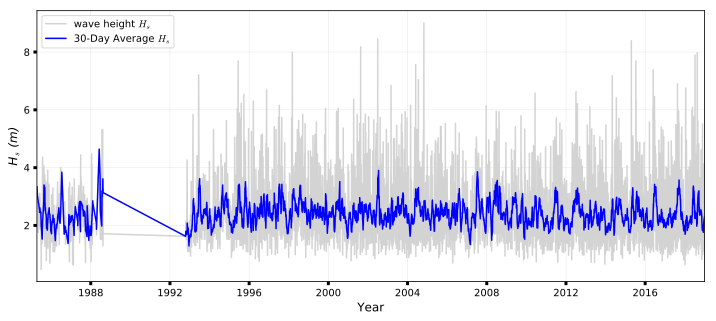

Figure saved:  seriesH
Max wave period: 12.169 s
Mean wave period: 6.367 s
Median wave period: 6.250 s
95th percentile wave period: 8.066 s


Max wave power: 1916.031 kW/m
Mean wave power: 91.215 kW/m
Median wave power: 59.459 kW/m
95th percentile wave power: 279.868 kW/m


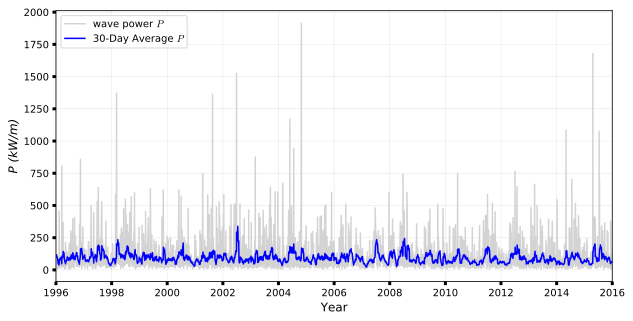

Max wave energy: 101887.756 J/m2
Mean wave energy: 8429.899 J/m2
Median wave energy: 6106.254 J/m2
95th percentile wave energy: 23618.542 J/m2


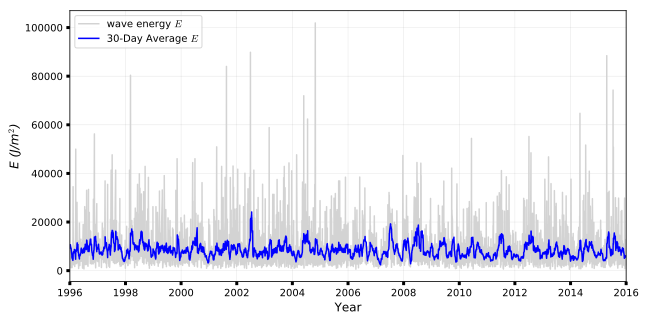

Max wave celerity: 18.993 m/s
Mean wave celerity: 9.937 m/s
Median wave celerity: 9.755 m/s
95th percentile wave celerity: 12.589 m/s


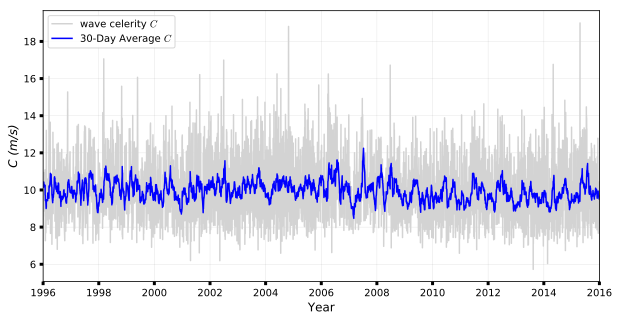

In [26]:
# Significant wave height
wa.plotTimeSeries(series='H', fsize=(12, 5), fsave='seriesH')

# Wave period
wa.plotTimeSeries(time=[1995,2016], series='T', fsize=(10, 5), fsave=None)

# Wave power
wa.plotTimeSeries(time=[1995,2016], series='P', fsize=(10, 5), fsave=None)

# Wave energy
wa.plotTimeSeries(time=[1995,2016], series='E', fsize=(10, 5), fsave=None)

# Wave group velocity
wa.plotTimeSeries(time=[1995,2016], series='Cg', fsize=(10, 5), fsave=None)

# Processing wave seasonability trends 

In addition to time series, one can analyse the seasonal characteristics of each parameter computed from the altimeter dataset. 

For a specified time interval and geographical extent, it computes the monthly seasonality of specific wave variables (the option in the `series` keyword are: wh, period, power, energy and speed). 

Obtained monthly averaged values are stored and returned with a `Pandas` dataframe. 

> User has the option to plot the computed wave paraneter characteristics as a heatmap, a box plot and a standard deviation graph.

For the wave height series, a **Seasonal Mann-Kendall** test is also performed to determine monotonic trends in computed dataset using the package from Hussain & Mahmud (2019).

Hussain & Mahmud, 2019: pyMannKendall: a python package for non parametric Mann Kendall family of trend tests - JOSS, 4(39), 1556.

A full explanation on the available options for the `computeSeasonalCharacteristics` function is provided in the [API](https://radwave.readthedocs.io/en/latest/RADWave.html#RADWave.altiwave.waveAnalysis.computeSeasonalCharacteristics).

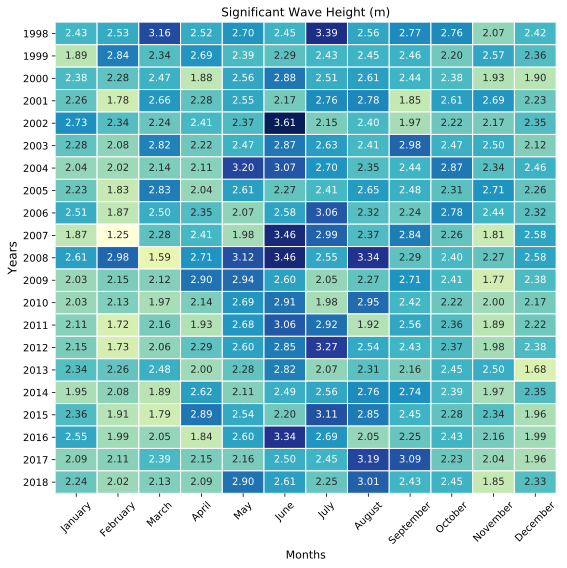

Figure saved:  whall_wh_heatmap


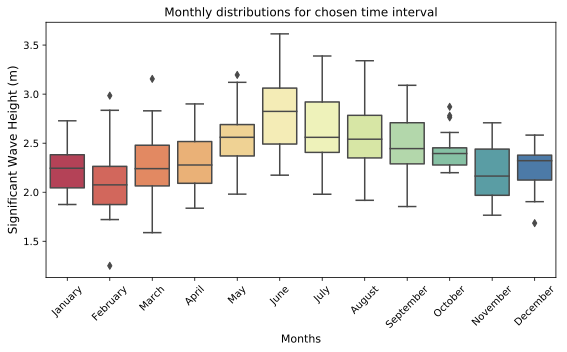

Figure saved:  whall_wh_distribution


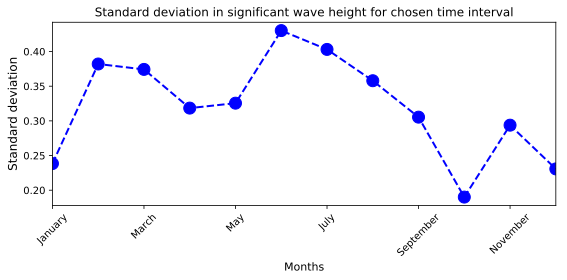

Figure saved:  whall_wh_sd
 
Change in yearly wave height trend accounting for seasonality:
    +           trend:  decreasing
    +    slope (cm/y):  -0.88


In [12]:
wh_all = wa.computeSeasonalCharacteristics(series='wh', time=[1998,2018], lonlat=None, fsave='whall', plot=True)

As mentionned above, the function `computeSeasonalCharacteristics` returns a **Pandas dataframe** containing the mean monthly values of specified wave series for the considered time interval.

These information can be displayed with: 

In [25]:
display(wh_all)

month   January  February     March     April       May      June      July  \
year                                                                          
1998   2.430708  2.532708  3.155588  2.516903  2.696875  2.454518  3.388697   
1999   1.892945  2.835104  2.341224  2.693469  2.389533  2.294297  2.428448   
2000   2.382259  2.282550  2.465672  1.877737  2.560141  2.881472  2.506445   
2001   2.264941  1.777862  2.664580  2.277709  2.548330  2.174072  2.756260   
2002   2.728196  2.342976  2.240439  2.407555  2.369577  3.614361  2.150274   
2003   2.281892  2.075064  2.819255  2.216945  2.465973  2.868992  2.627088   
2004   2.044559  2.015772  2.137600  2.109058  3.196000  3.070369  2.704433   
2005   2.233434  1.833415  2.829885  2.036909  2.611029  2.268810  2.406200   
2006   2.511800  1.874141  2.501329  2.354065  2.074328  2.577500  3.061460   
2007   1.874885  1.250292  2.284810  2.406825  1.980735  3.456116  2.994022   
2008   2.614000  2.984700  1.588053  2.708630  3.120405  3.457781  2.554857   
2009   2.031433  2.151691  2.115982  2.900167  2.942266  2.600726  2.045692   
2010   2.034563  2.132828  1.966315  2.137183  2.689828  2.906857  1.979568   
2011   2.108511  1.721214  2.159424  1.931393  2.676700  3.061689  2.920149   
2012   2.151345  1.734163  2.064318  2.287625  2.601378  2.848603  3.271721   
2013   2.335345  2.263853  2.479231  2.000804  2.279766  2.823898  2.065377   
2014   1.954052  2.084139  1.893296  2.618659  2.112208  2.491250  2.559717   
2015   2.359518  1.908259  1.786735  2.890227  2.536816  2.198500  3.110094   
2016   2.547292  1.993036  2.049512  1.837171  2.598844  3.339692  2.692148   
2017   2.085990  2.108370  2.391393  2.148756  2.156955  2.499939  2.450019   
2018   2.244597  2.022900  2.128739  2.091090  2.899360  2.609978  2.248512   

month    August  September   October  November  December      mean  
year                                                                
1998   2.563018   2.770310  2.763125  2.068613  2.421719  2.646899  
1999   2.450440   2.463069  2.199125  2.570150  2.357275  2.409590  
2000   2.614807   2.444766  2.380594  1.933333  1.903958  2.352811  
2001   2.783944   1.854290  2.609139  2.686850  2.234946  2.386077  
2002   2.399048   1.974952  2.221433  2.169683  2.352739  2.414269  
2003   2.409982   2.977869  2.472603  2.498670  2.124275  2.486551  
2004   2.349579   2.444620  2.870773  2.337589  2.464018  2.478697  
2005   2.652822   2.479630  2.306053  2.707927  2.257046  2.385263  
2006   2.322393   2.242643  2.780741  2.439765  2.321297  2.421788  
2007   2.365000   2.844460  2.259868  1.809058  2.578848  2.342076  
2008   3.340414   2.289059  2.396443  2.266259  2.582483  2.658590  
2009   2.271133   2.708469  2.405597  1.765875  2.378313  2.359779  
2010   2.947585   2.422043  2.222925  2.004400  2.174207  2.301525  
2011   1.917765   2.559896  2.357643  1.890067  2.216273  2.293394  
2012   2.540730   2.433425  2.369526  1.983294  2.380167  2.388858  
2013   2.310035   2.161815  2.450060  2.503322  1.684851  2.279863  
2014   2.759245   2.736796  2.394593  1.968639  2.353283  2.327156  
2015   2.847896   2.447982  2.277615  2.337404  1.961268  2.388526  
2016   2.045673   2.253153  2.433038  2.164688  1.993742  2.328999  
2017   3.192314   3.090049  2.231429  2.038147  1.960747  2.362842  
2018   3.008994   2.433930  2.452541  1.849587  2.333006  2.360270

Below we provide an example of how this function can be used to process seasonability for different geographical extents.

In [14]:
# First we create a dictionary of 1 by 1 degree tiles within our regional area of interest
tiles = []
tiles.append([152.0,153.0,-36.0,-35.0])
tiles.append([153.0,154.0,-36.0,-35.0])
tiles.append([152.0,153.0,-35.0,-34.0])
tiles.append([153.0,154.0,-35.0,-34.0])

# We also store the geographical locations of the center of each tile 
lonlat = []
lonlat.append([152.5,-35.5])
lonlat.append([153.5,-35.5])
lonlat.append([152.5,-34.5])
lonlat.append([153.5,-34.5])


# And we define a new dictionary that will be filled with regional wave seasonability
seasons = []

# Finally we loop over the defined tiles and perform seasonability analysis for significant wave height
for k in range(4):
    seasons.append(wa.computeSeasonalCharacteristics(series='wh', time=[1998,2018], 
                                        lonlat=tiles[k], plot=False))

This can then be used to plot the annual mean values of significant wave height for each tile over the temporal range of interest... 

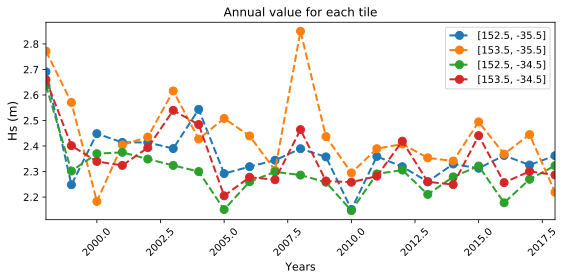

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.transforms import offset_copy
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['mathtext.fontset'] = 'cm'

fig, ax = plt.subplots(figsize = (8,4))

for k in range(4):
    yearwh = seasons[k]['mean']
    yearwh.plot(marker='o', linestyle='dashed', linewidth=2, markersize=8)
    
ax.set_title('Annual value for each tile',fontsize = 12)
ax.set_ylabel("Hs (m)",fontsize = 12)
ax.set_xlabel('Years',fontsize = 11)
ax.legend([lonlat[0],lonlat[1],lonlat[2],lonlat[3]])
ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10, rotation=45)
plt.tight_layout()
plt.show()